<a href="https://colab.research.google.com/github/mazon1/ML-Test/blob/master/1_Amii_Project_Prep_1_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Read In Data

In [ ]:
# Read in the data from the data folder
import pandas as pd

# import google drive
from google.colab import drive
drive.mount('/content/drive/')

# Change directory to google drive- Just upload the file right into the drive you want(Uchennamachine) for easy access
%cd /content/drive/My Drive/

df = pd.read_csv("nasa_data.csv")

#define titanic - you'd need this going forward
nasa = pd.read_csv('nasa_data.csv')
nasa.head()


Mounted at /content/drive/
/content/drive/My Drive


,unit_number,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,condition,max_cycles,target
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,1,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,1,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,1,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,1,192,187


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
import seaborn as sns

In [ ]:
# Check the number of rows and columns in the data
nasa.shape

(160359, 29)

In [ ]:
# Check the type of data stored in each column
nasa.dtypes

unit_number         int64
time_in_cycles      int64
Altitud           float64
Mach Number       float64
TRA               float64
T2                float64
T24               float64
T30               float64
T50               float64
P2                float64
P15               float64
P30               float64
Nf                float64
Nc                float64
epr               float64
Ps30              float64
phi               float64
NRf               float64
NRc               float64
BPR               float64
farB              float64
htBleed             int64
Nf_dmd              int64
PCNfR_dmd         float64
W31               float64
W32               float64
condition           int64
max_cycles          int64
target              int64
dtype: object

In [ ]:
# See the distribution of our target variable
nasa['target'].value_counts()

60     709
64     709
74     709
73     709
72     709
      ... 
529      1
534      1
533      1
532      1
540      1
Name: target, Length: 543, dtype: int64

In [ ]:
# Check if there are any missing values
nasa.isnull().sum()

unit_number       0
time_in_cycles    0
Altitud           0
Mach Number       0
TRA               0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
epr               0
Ps30              0
phi               0
NRf               0
NRc               0
BPR               0
farB              0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
condition         0
max_cycles        0
target            0
dtype: int64

In [ ]:
#defining a new target variable based on a minimum threshold of 25
target = 25
label_positive =nasa['target'] <= target 
nasa['label_target']=0
nasa.loc[label_positive,'label_target'] = 1

#Unit number not likely to be relevant to the process, also condition is just the data set #
nasa.drop(columns=['max_cycles','target','unit_number','condition'],inplace = True)




In [ ]:
X = nasa.drop(['label_target'], axis=1)
y = nasa['label_target']

#splitting the data set (note we already have an actual test set, so this test set here is the validation set)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42,stratify=y)

In [ ]:
X_train.head()

,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
159047,299,35.0020,0.8417,100.0,449.44,555.10,1369.15,1140.66,5.48,7.98,198.02,2223.46,8387.89,1.04,42.45,186.91,2388.57,8107.35,9.1173,0.02,336,2223,100.00,15.15,9.2185
32086,64,42.0064,0.8400,100.0,445.00,549.32,1352.52,1114.88,3.91,5.71,138.64,2211.92,8327.77,1.02,42.14,130.60,2387.94,8087.11,9.3617,0.02,329,2212,100.00,10.65,6.2992
155840,196,35.0050,0.8400,100.0,449.44,555.15,1363.23,1126.76,5.48,7.98,196.53,2223.24,8363.38,1.03,41.95,184.96,2388.39,8089.61,9.2291,0.02,334,2223,100.00,14.98,9.1078
134494,98,20.0057,0.7007,100.0,491.19,607.12,1479.43,1245.62,9.35,13.65,335.13,2323.97,8738.27,1.08,43.99,315.50,2388.14,8079.62,9.2126,0.02,364,2324,100.00,24.61,14.6590
126998,25,25.0076,0.6215,60.0,462.54,537.00,1261.28,1051.99,7.05,9.02,175.36,1915.08,7997.95,0.94,36.81,164.57,2027.95,7860.80,10.9176,0.02,308,1915,84.93,14.33,8.4650


In [ ]:
#confirming that the split was done (67% to 33%)
for dataset in [y_train, y_test]:
    print(round(len(dataset) / len(y), 2))

0.67
0.33


#Detecting Outliers


In [ ]:
# The entire data set is continuous (except the label_target) 
#Look at the general distribution of the features
nasa.describe()

,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,label_target
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,2273.829707,8677.553696,1.153705,44.212049,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700,0.885045
std,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,142.426613,374.657454,0.142103,3.426342,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067,0.318968
min,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500,0.000000
25%,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,2212.120000,8334.770000,1.020000,42.010000,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300,1.000000
50%,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,2319.370000,8764.200000,1.090000,44.930000,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500,1.000000
75%,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,2388.050000,9055.850000,1.300000,47.340000,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600,1.000000
max,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,2388.640000,9244.590000,1.320000,48.530000,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,1.000000


In [ ]:
# nasa['test']=nasa['unit_number'].apply(lambda x:1 if (x > mean['unit_number']+std['unit_number']*2) or ( x < mean['unit_number']-std['unit_number']*2)  else 0)
# nasa.test.sum()

std = nasa.describe().loc['std',:]
mean = nasa.describe().loc['mean',:]

out=pd.DataFrame()
num_outliers=[]
for col in nasa.columns:
    outliers=nasa[col].apply(lambda x:1 if (x > mean[col]+std[col]*2) or ( x < mean[col]-std[col]*2)  else 0)
    num_outliers.append(outliers.sum())
    

out = pd.DataFrame([num_outliers],columns=nasa.columns)

In [ ]:
out.T

,0
time_in_cycles,6316
Altitud,0
Mach Number,0
TRA,17141
T2,0
T24,0
T30,0
T50,0
P2,0
P15,0


Using this , The features with significant outliers would be: TRA,Nf,Ps30, NRf, NRc, BPR, Nf_dmd,PCNFR_dmd

In [ ]:
#Calculate Percentage of outliers 
out_pct = pd.DataFrame()
pct_outliers = []

for col in out:
    outlier_pct = round(out[col][0]/nasa[col].count().sum(),4)
    pct_outliers.append(outlier_pct*100)

out_pct = pd.DataFrame([pct_outliers],columns=nasa.columns,index=['Percent_Outliers'])
out_pct.T

,Percent_Outliers
time_in_cycles,3.94
Altitud,0.00
Mach Number,0.00
TRA,10.69
T2,0.00
T24,0.00
T30,0.00
T50,0.00
P2,0.00
P15,0.00


In [ ]:
#to revisit outliers after further exploration

In [ ]:
# Explore the number of unique values for each feature
for col in nasa.columns:
    print('{}: {} unique values'.format(col, nasa[col].nunique()))

time_in_cycles: 543 unique values
Altitud: 670 unique values
Mach Number: 111 unique values
TRA: 2 unique values
T2: 6 unique values
T24: 1799 unique values
T30: 15377 unique values
T50: 20582 unique values
P2: 6 unique values
P15: 56 unique values
P30: 6311 unique values
Nf: 1163 unique values
Nc: 34161 unique values
epr: 21 unique values
Ps30: 771 unique values
phi: 5982 unique values
NRf: 567 unique values
NRc: 20090 unique values
BPR: 13124 unique values
farB: 2 unique values
htBleed: 58 unique values
Nf_dmd: 6 unique values
PCNfR_dmd: 2 unique values
W31: 676 unique values
W32: 26659 unique values
label_target: 2 unique values


In [ ]:
#key features with uniqueness: TRA,farB and label target (2 unique features)
#Also T2,P2,Nf_dmd (6 unique features)

# Test for correlation

In [ ]:
# Look at the correlation matrix
nasa.corr()

,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,label_target
time_in_cycles,1.000000,-0.009588,-0.009960,0.000687,0.009526,0.012651,0.029766,0.036380,0.010034,0.009417,0.013459,0.005933,0.033241,0.017375,0.043362,0.013595,0.001481,0.098462,-0.017034,0.043034,0.029852,0.005334,0.000687,0.010540,0.010593,-0.389763
Altitud,-0.009588,1.000000,0.967487,-0.163079,-0.979797,-0.925472,-0.877521,-0.909480,-0.991539,-0.985378,-0.971758,-0.619974,-0.871095,-0.899679,-0.757426,-0.971526,-0.163065,-0.459088,0.642981,-0.901542,-0.879403,-0.619531,-0.163079,-0.977664,-0.977674,-0.000958
Mach Number,-0.009960,0.967487,1.000000,-0.197923,-0.939207,-0.898218,-0.867189,-0.912110,-0.965691,-0.963720,-0.958469,-0.624050,-0.863267,-0.934591,-0.774244,-0.958404,-0.197861,-0.527713,0.686817,-0.932897,-0.869323,-0.623632,-0.197923,-0.959658,-0.959656,-0.000594
TRA,0.000687,-0.163079,-0.197923,1.000000,0.264989,0.493244,0.601374,0.539436,0.230742,0.290031,0.365802,0.870596,0.612030,0.520732,0.754369,0.366734,0.999998,0.904365,-0.843670,0.359027,0.598086,0.870889,1.000000,0.344868,0.344814,-0.001989
T2,0.009526,-0.979797,-0.939207,0.264989,1.000000,0.969407,0.926589,0.943456,0.992550,0.992447,0.985351,0.705086,0.921489,0.901398,0.820482,0.985205,0.264958,0.523178,-0.698151,0.873423,0.928151,0.704665,0.264989,0.987856,0.987864,0.000917
T24,0.012651,-0.925472,-0.898218,0.493244,0.969407,1.000000,0.989141,0.988864,0.954472,0.969469,0.982334,0.857322,0.987073,0.945763,0.932675,0.982442,0.493222,0.702645,-0.844254,0.879724,0.989728,0.857009,0.493244,0.979178,0.979172,-0.005379
T30,0.029766,-0.877521,-0.867189,0.601374,0.926589,0.989141,1.000000,0.993401,0.911783,0.934604,0.958539,0.914962,0.998325,0.958726,0.973479,0.958803,0.601383,0.792588,-0.907534,0.878761,0.998944,0.914698,0.601374,0.952101,0.952087,-0.027544
T50,0.036380,-0.909480,-0.912110,0.539436,0.943456,0.988864,0.993401,1.000000,0.936864,0.955790,0.975306,0.877880,0.991848,0.977042,0.957909,0.975534,0.539443,0.764897,-0.886103,0.912335,0.993885,0.877577,0.539436,0.969753,0.969742,-0.038353
P2,0.010034,-0.991539,-0.965691,0.230742,0.992550,0.954472,0.911783,0.936864,1.000000,0.998092,0.989562,0.675870,0.906331,0.911788,0.803080,0.989408,0.230709,0.511161,-0.689424,0.892455,0.913622,0.675427,0.230742,0.992562,0.992570,0.000904
P15,0.009417,-0.985378,-0.963720,0.290031,0.992447,0.969469,0.934604,0.955790,0.998092,1.000000,0.996500,0.719400,0.929932,0.930701,0.837789,0.996411,0.289997,0.560980,-0.732014,0.901583,0.936218,0.718983,0.290031,0.998033,0.998038,0.000591


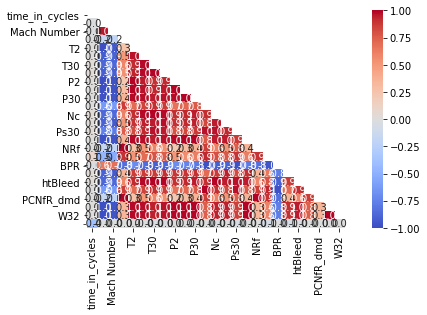

In [ ]:
#visualizing correlation matrix with a correlation heat map
# Generate correlation matrix heat map
matrix = np.triu(nasa.corr())
sns.heatmap(nasa.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [ ]:
#create a copy of the dataframe for further exploration
nasa_corr2=nasa.copy()

In [ ]:
#Recall : key features with uniqueness: TRA,farB and label target (2 unique features)
#Also T2,P2,Nf_dmd (6 unique features)
# Correlating over key features with 2 unique outcomes:

# Drop all non key features
non_key = ['time_in_cycles', 'Altitud', 'Mach Number', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR',  'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32'
       ]
nasa_corr2.drop(non_key, axis = 1, inplace = True)
nasa_corr2.head()






,TRA,farB,label_target
0,100.0,0.03,1
1,100.0,0.03,1
2,100.0,0.03,1
3,100.0,0.03,1
4,100.0,0.03,1


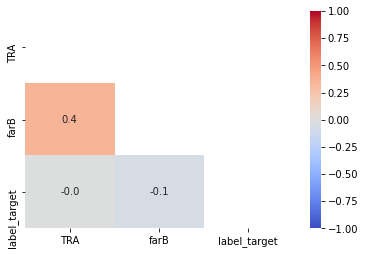

In [ ]:
#visualizing correlation matrix with a correlation heat map
# Generate correlation matrix heat map
matrix = np.triu(nasa_corr2.corr())
sns.heatmap(nasa_corr2.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [ ]:
#Slight correlation between features observed.

In [ ]:
# Check label target outcome by TRA & farB
nasa_corr2.groupby('TRA').count()

,farB,label_target
TRA,,
60.0,17141,17141
100.0,143218,143218


In [ ]:
# Check label target outcome by TRA & farB
nasa_corr2.groupby('farB').count()

,TRA,label_target
farB,,
0.02,77207,77207
0.03,83152,83152


In [ ]:
# Look at label_target rate by farB and TRA
nasa.pivot_table('label_target', index=['farB', 'TRA'], aggfunc=['count', 'mean'])

count         mean
           label_target label_target
farB TRA                            
0.02 60.0         17141     0.886879
     100.0        60066     0.907635
0.03 100.0        83152     0.868350

In [ ]:
#create a copy of the dataframe for further exploration
nasa_corr6=nasa.copy()


Drop non key features 

In [ ]:
#Recall : key features with uniqueness: TRA,farB and label target (2 unique features)
#Also T2,P2,Nf_dmd (6 unique features)
# Correlating over key features with 6 unique outcomes:

# Drop all non key features
non_key = ['time_in_cycles', 'Altitud', 'Mach Number',  'T24', 'T30',
       'T50',  'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR',  'htBleed',  'PCNfR_dmd', 'W31', 'W32'
       ]
nasa_corr6.drop(non_key, axis = 1, inplace = True)
nasa_corr6.head()

,TRA,T2,P2,farB,Nf_dmd,label_target
0,100.0,518.67,14.62,0.03,2388,1
1,100.0,518.67,14.62,0.03,2388,1
2,100.0,518.67,14.62,0.03,2388,1
3,100.0,518.67,14.62,0.03,2388,1
4,100.0,518.67,14.62,0.03,2388,1


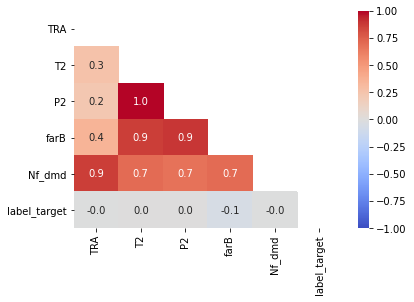

In [ ]:
#visualizing correlation matrix with a correlation heat map
# Generate correlation matrix heat map
matrix = np.triu(nasa_corr6.corr())
sns.heatmap(nasa_corr6.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask=matrix)

In [ ]:
# Strong Correlation observed between T2 & P2

In [ ]:
# Look at label_target rate by T2 and P2
nasa.pivot_table('label_target', index=['T2', 'P2'], aggfunc=['count', 'mean'])

,,count,mean
,,label_target,label_target
T2,P2,,
445.00,3.91,28853,0.883998
449.44,5.48,17199,0.884412
462.54,7.05,17141,0.886879
489.05,10.52,17320,0.884007
491.19,9.35,17213,0.885726
518.67,14.62,62633,0.885300


we're looking for two things here for each feature. The first is how correlated is it with the target column? We want the absolute value of the correlation between features and the thing you're trying to predict to be quite high. Keep in mind a strong negative correlation is just as useful as a strong positive correlation. We just don't want the correlation to be close to zero. Secondly, we want to know how correlated a certain feature is with all the other features. We want the correlation with other features to be low. When the features are correlated with each other, sometimes it can confuse the model because the model can't quite parse out which feature the signal is coming from. 

Lots of correlation noticed between features. This may confuse the model. More Cleaning required.

In [ ]:
from scipy import stats


In [ ]:
def describe_cont_feature(feature):
    print('\n*** Results for {} ***'.format(feature))
    print(nasa.groupby('label_target')[feature].describe())
    print(ttest(feature))
    
def ttest(feature):
    enginefail = nasa[nasa['label_target']==1][feature]
    engineok = nasa[nasa['label_target']==0][feature]
    tstat, pval = stats.ttest_ind(enginefail, engineok, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3}'.format(tstat, pval))

In [ ]:
nasa.columns

Index(['time_in_cycles', 'Altitud', 'Mach Number', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'label_target'],
      dtype='object')

In [ ]:
# Look at the distribution of each feature at each level of the target variable
for feature in ['time_in_cycles', 'Altitud', 'Mach Number', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']:
    describe_cont_feature(feature)


*** Results for time_in_cycles ***
                 count        mean        std  ...    50%    75%    max
label_target                                   ...                     
0              18434.0  213.676305  66.812031  ...  196.0  247.0  543.0
1             141925.0  111.596836  78.150036  ...  101.0  156.0  517.0

[2 rows x 8 columns]
t-statistic: -191.2, p-value: 0.0
None

*** Results for Altitud ***
                 count       mean        std  ...      50%      75%     max
label_target                                  ...                          
0              18434.0  17.255928  16.554924  ...  19.9982  35.0016  42.008
1             141925.0  17.206264  16.524536  ...  19.9981  35.0015  42.008

[2 rows x 8 columns]
t-statistic: -0.4, p-value: 0.702
None

*** Results for Mach Number ***
                 count      mean       std     min     25%   50%   75%    max
label_target                                                                 
0              18434.0  0.410610

# Plot Continuous Features

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



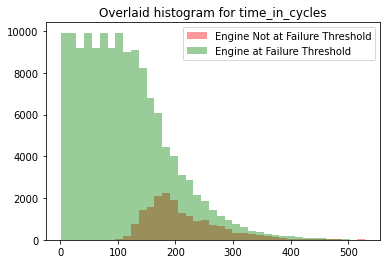

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



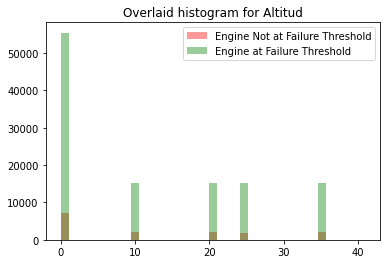

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



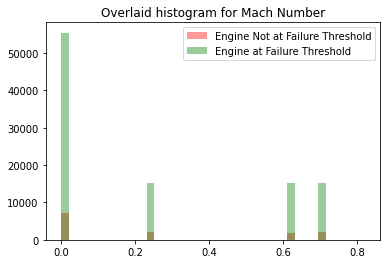

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



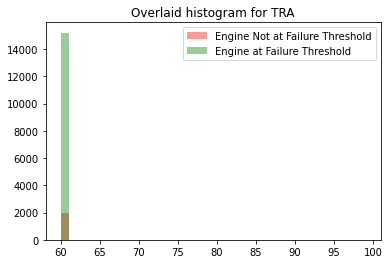

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



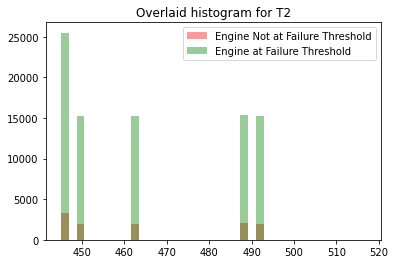

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



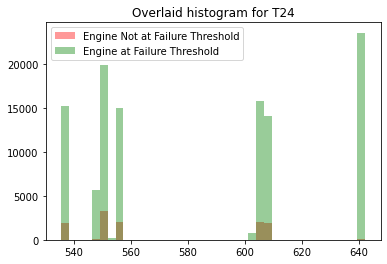

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



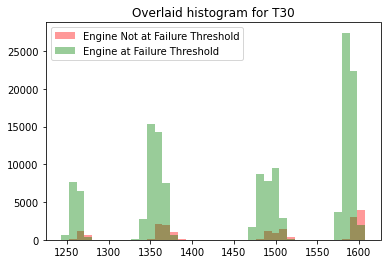

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



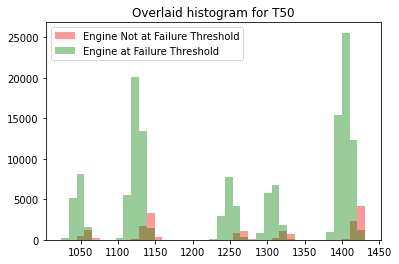

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



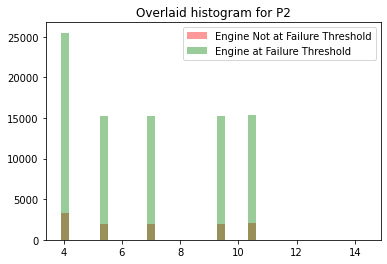

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



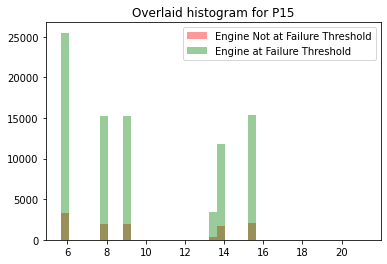

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



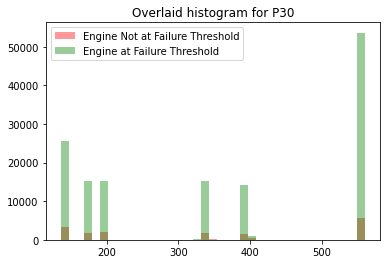

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



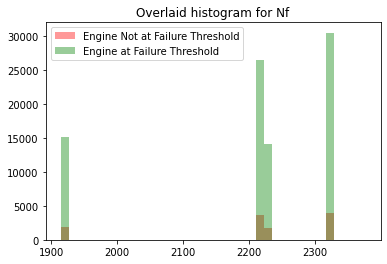

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



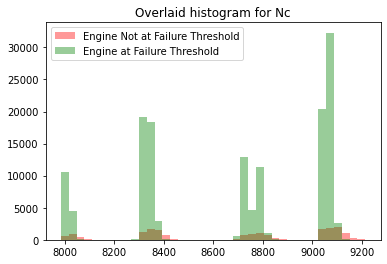

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



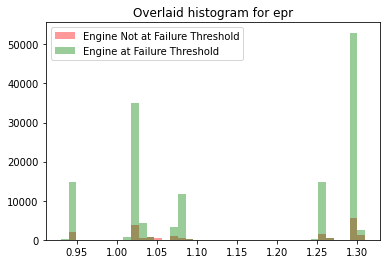

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



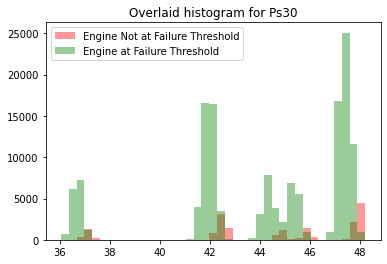

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



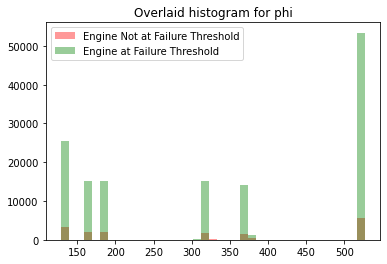

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



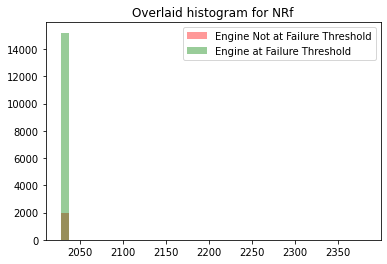

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



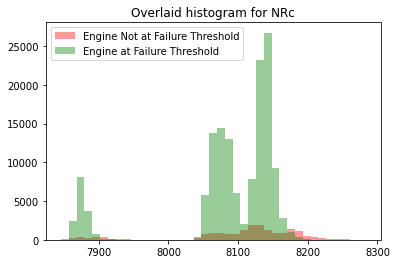

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



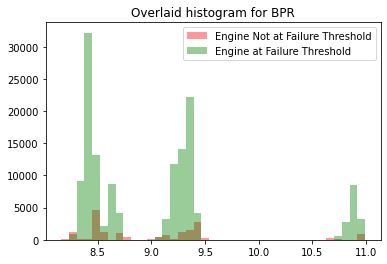

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



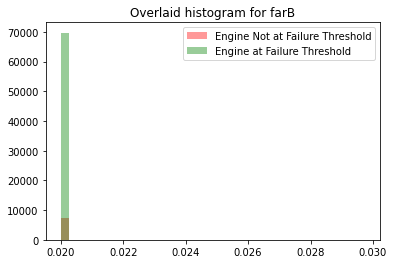

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



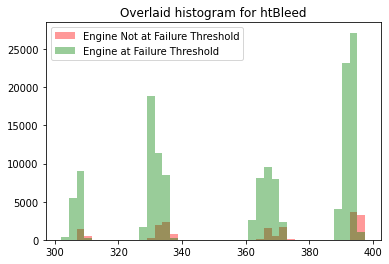

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



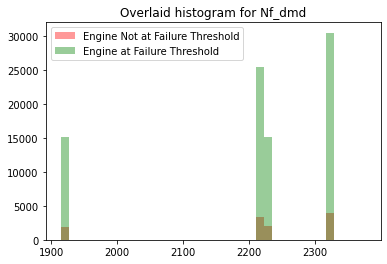

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



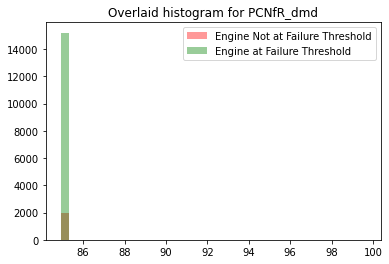

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



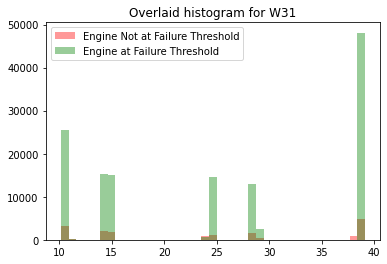

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



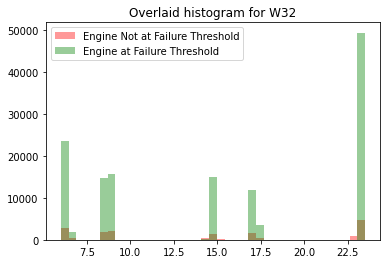

In [ ]:
# Plot overlaid histograms for continuous features
for i in ['time_in_cycles', 'Altitud', 'Mach Number', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']:
    engineok = list(nasa[nasa['label_target'] == 0][i].dropna())
    enginefail = list(nasa[nasa['label_target'] == 1][i].dropna())
    xmin = min(min(engineok), min(enginefail))
    xmax = max(max(engineok), max(enginefail))
    width = (xmax - xmin) / 40
    sns.distplot(engineok, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(enginefail, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Engine Not at Failure Threshold', 'Engine at Failure Threshold'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

# Explore Categorical Features

In [ ]:
# No categorical feature to explore except label

# Remove Outliers
Capping: Remove outliers on high end

Flooring : Remove outliers on low end

Recall: The features with significant outliers detected earlier on were: TRA,Nf,Ps30, NRf, NRc, BPR, Nf_dmd,PCNFR_dmd

In [ ]:
#Look at the general distribution of the features
nasa.describe()

,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,label_target
count,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000,160359.000000
mean,123.331338,17.211973,0.410004,95.724344,485.840890,597.361022,1467.035653,1260.956434,9.894999,14.424935,359.729968,2273.829707,8677.553696,1.153705,44.212049,338.789821,2349.645243,8088.950972,9.054747,0.025185,360.698801,2273.754039,98.389146,25.942709,15.565700,0.885045
std,83.538146,16.527988,0.367938,12.359044,30.420388,42.478516,118.175261,136.300073,4.265554,6.443922,174.133835,142.426613,374.657454,0.142103,3.426342,164.193480,111.167242,80.623257,0.751581,0.004997,31.021430,142.513114,4.656270,11.691422,7.015067,0.318968
min,1.000000,-0.008700,-0.000600,60.000000,445.000000,535.480000,1242.670000,1023.770000,3.910000,5.670000,136.170000,1914.720000,7984.510000,0.930000,36.040000,128.310000,2027.570000,7845.780000,8.156300,0.020000,302.000000,1915.000000,84.930000,10.160000,6.010500,0.000000
25%,57.000000,0.001300,0.000200,100.000000,449.440000,549.960000,1357.360000,1126.830000,5.480000,8.000000,175.710000,2212.120000,8334.770000,1.020000,42.010000,164.790000,2387.970000,8070.530000,8.439250,0.020000,332.000000,2212.000000,100.000000,14.330000,8.601300,1.000000
50%,114.000000,19.998100,0.620000,100.000000,489.050000,605.930000,1492.810000,1271.740000,9.350000,13.660000,341.690000,2319.370000,8764.200000,1.090000,44.930000,321.690000,2388.070000,8118.590000,9.030100,0.030000,367.000000,2319.000000,100.000000,24.920000,14.953500,1.000000
75%,173.000000,35.001500,0.840000,100.000000,518.670000,642.340000,1586.590000,1402.200000,14.620000,21.610000,553.290000,2388.050000,9055.850000,1.300000,47.340000,521.340000,2388.160000,8139.410000,9.344200,0.030000,392.000000,2388.000000,100.000000,38.820000,23.294600,1.000000
max,543.000000,42.008000,0.842000,100.000000,518.670000,645.110000,1616.910000,1441.490000,14.620000,21.610000,570.810000,2388.640000,9244.590000,1.320000,48.530000,537.490000,2390.490000,8293.720000,11.066900,0.030000,400.000000,2388.000000,100.000000,39.890000,23.950500,1.000000


In [ ]:
# def detect_outlier(feature):
#     outliers = []
#     data = nasa[feature]
#     mean = np.mean(data)
#     std =np.std(data)
    
    
#     for y in data:
#         z_score= (y - mean)/std 
#         if np.abs(z_score) > 3:
#             outliers.append(y)
#     print('\nOutlier caps for {}:'.format(feature))
#     print('  --95p: {:.1f} / {} values exceed that'.format(data.quantile(.95),
#                                                              len([i for i in data
#                                                                   if i > data.quantile(.95)])))
#     print('  --3sd: {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
#     print('  --99p: {:.1f} / {} values exceed that'.format(data.quantile(.99),
#                                                              len([i for i in data
#                                                                   if i > data.quantile(.99)])))

In [ ]:
# # Determine what the upperbound should be for continuous features
# for feat in ['TRA','Nf','Ps30', 'NRf', 'NRc', 'BPR', 'Nf_dmd','PCNFR_dmd']:
#     detect_outlier(feat)

In [ ]:
# Cap features for TRA example
# nasa['TRA'].clip(upper=nasa['TRA'].quantile(.99),inplace = True)


Code to Cap/Floor Outliers above. Not yet implemented as more information is required from domain experts to establish the relevance or non -relevance of the outliers

# Transforming Skewed Features

In [ ]:
nasa.head()

,time_in_cycles,Altitud,Mach Number,TRA,T2,T24,T30,T50,P2,P15,P30,Nf,Nc,epr,Ps30,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,label_target
0,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,1
1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,1
2,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,1
3,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,1
4,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,1


In [ ]:
nasa.columns

Index(['time_in_cycles', 'Altitud', 'Mach Number', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'label_target'],
      dtype='object')

# Normalize


In [ ]:
import sklearn.preprocessing

In [ ]:
nasa.columns

Index(['time_in_cycles', 'Altitud', 'Mach Number', 'TRA', 'T2', 'T24', 'T30',
       'T50', 'P2', 'P15', 'P30', 'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf',
       'NRc', 'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32',
       'label_target'],
      dtype='object')

In [ ]:
col_names=nasa.drop(columns=['label_target']).columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

MinMax_norm = MinMaxScaler().fit(X_train)
X_train_norm = MinMax_norm.transform(X_train) 
nasa_norm=pd.DataFrame(X_Train_norm,columns=col_names)

In [ ]:
print(X_train_norm)

[[5.49815498e-01 8.33256776e-01 9.99643959e-01 ... 1.00000000e+00
  1.67565745e-01 1.79163828e-01]
 [1.16236162e-01 9.99961920e-01 9.97626394e-01 ... 1.00000000e+00
  1.58462576e-02 1.61236275e-02]
 [3.59778598e-01 8.33328177e-01 9.97626394e-01 ... 1.00000000e+00
  1.61834120e-01 1.72981335e-01]
 ...
 [1.16236162e-01 1.76120447e-04 1.06812248e-03 ... 1.00000000e+00
  9.76062036e-01 9.69992293e-01]
 [2.63837638e-01 5.95189532e-01 7.36529789e-01 ... 0.00000000e+00
  1.36547539e-01 1.42420722e-01]
 [2.67527675e-01 9.99788179e-01 9.97626394e-01 ... 1.00000000e+00
  1.11260958e-02 1.60063445e-02]]


# Standardize

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ss_std = StandardScaler().fit(X_train)
X_train_std = ss_std.transform(X_train) 
nasa_stnd = pd.DataFrame(X_Train_std,columns=col_names)

In [ ]:
def stats_comparison(features):
    stats=pd.DataFrame()
    for f in features:
        std_f = std[f]
        mean_f= mean[f]
        std_norm = np.std(nasa_norm[f])
        mean_norm = np.mean(nasa_norm[f])
        std_stnd = np.std(nasa_stnd[f])
        mean_stnd = np.mean(nasa_stnd[f])
        answ = pd.DataFrame([std_f,mean_f,std_norm,mean_norm,std_stnd,mean_stnd],columns=[f], index=['Original_STD','Original_Mean','Normalize_STD','Normalize_Mean','Standard_STD','Standard_Mean']).T
        stats = pd.concat([stats,answ])

    return stats

In [ ]:
features_compare = ['time_in_cycles','W31','NRf']
stats_comparison(features_compare)

,Original_STD,Original_Mean,Normalize_STD,Normalize_Mean,Standard_STD,Standard_Mean
time_in_cycles,83.538146,123.331338,0.154400,0.226511,1.0,2.820456e-17
W31,11.691422,25.942709,0.393776,0.530303,1.0,-1.549096e-14
NRf,111.167242,2349.645243,0.306529,0.887318,1.0,-8.244583e-13


In [ ]:
print(X_train_std)

[[ 2.09393461  1.0746936   1.17159953 ...  0.34625125 -0.92117695
  -0.90283959]
 [-0.71421691  1.49880398  1.16697466 ...  0.34625125 -1.3064713
  -1.31942214]
 [ 0.86312777  1.07487524  1.16697466 ...  0.34625125 -0.93573251
  -0.91863642]
 ...
 [-0.71421691 -1.04472604 -1.11743853 ...  0.34625125  1.13201388
   1.11779912]
 [ 0.24174956  0.46903268  0.56846222 ... -2.88807621 -0.99994824
  -0.99672156]
 [ 0.26564873  1.49836197  1.16697466 ...  0.34625125 -1.31845824
  -1.3197218 ]]


# Creating an Indicator Variable

To create an indicator variable for Cabin (since about 75% of this was missing and clearly not at random as it strongly correlated with survival rate)

In [ ]:
# What would an indicator variable for Cabin look like? Shows survival rate
titanic.groupby(titanic['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [ ]:
# Create indicator feature to indicate if they had a cabin(1 ) or not (0)
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [ ]:
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


In [ ]:
# Create new CSV with updated data
titanic.to_csv('titanic_cabin_ind.csv', index=False)

# Combining Existing Features into New Features

In [ ]:
titanic = pd.read_csv('titanic_cabin_ind.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0


Combine SibSp & Parch Into New Family_cnt Feature

Convert Categorical Features to Numeric 


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Read in data
titanic = pd.read_csv('titanic_family_cnt.csv')
titanic.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_tr,Title,Cabin_ind,Family_cnt
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1,1
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,S,7.9250,1.512864,Miss,0,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,S,53.1000,2.213191,Mrs,1,1
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,S,8.0500,1.517606,Mr,0,0


In [ ]:
# Create new CSV with updated data
nasa.to_csv('nasa_cleaned.csv', index=False)